In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import tensorflow as tf

In [29]:
from sklearn.decomposition import NMF
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler

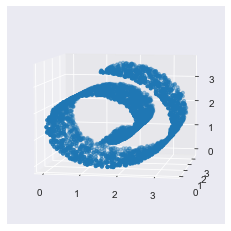

In [30]:
X, _ = make_swiss_roll(3000, noise=0.05, random_state=0)
X = StandardScaler().fit_transform(X)
X = X - np.min(X, axis=0)

# Generate labels
X_proj = Isomap(n_components=2).fit_transform(X)
labels = X_proj[:, 0]

def plot_data(X, ax, color=None):
    ax.scatter(
        X[:, 0],
        X[:, 1],
        X[:, 2],
        s=10,
        c=color
    )

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=7, azim=-80)
plot_data(X, ax)
plt.show()

In [31]:
nmf = NMF(n_components=2)
nmf.fit(X)

NMF(n_components=2)

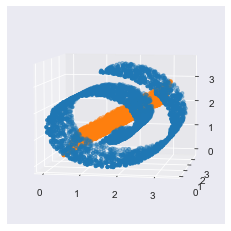

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=7, azim=-80)
plot_data(X, ax)

X_proj = nmf.transform(X)
X_reg = nmf.inverse_transform(X_proj)

plot_data(X_reg, ax)
plt.show()

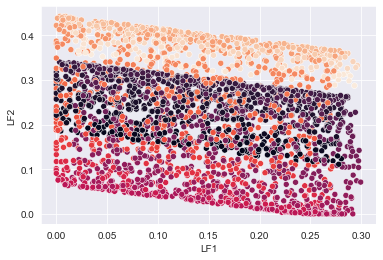

In [33]:
data = pd.DataFrame(dict(
    LF1=X_proj[:, 0],
    LF2=X_proj[:, 1],
    labels=labels
))
sns.scatterplot(data=data, x='LF1', y='LF2', hue='labels', legend=False, palette="rocket")
plt.show()